In [1]:
#from libreria_cri_2 import *
#import libreria_cri_2   
from sklearn.model_selection  import KFold, cross_val_score,GridSearchCV,train_test_split,StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import gc

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [10,10]

In [2]:
#import xgboost as xgb
gc.collect()


20

In [3]:
def lgb_predict(X_tr,X_te,y_train,y_test,X_objetivo):

    params = {
        'is_unbalance': 'true',
        'bagging_freq': 1,
        'bagging_fraction': 0.4,
        'boost_from_average':'false',
        'boost': 'gbdt',
        'feature_fraction': 0.05,
        'learning_rate': 0.01,
        'max_depth': -1,  
        'metric':'auc',
        'min_data_in_leaf': 80,
        'min_sum_hessian_in_leaf': 10.0,
        'num_leaves': 100,
        'num_threads': 16,
        'tree_learner': 'feature',
        'objective': 'binary', 
        'verbosity': 1,
         }


    train_data=lgb.Dataset(X_tr, y_train)
    test_data=lgb.Dataset(X_te, y_test, reference=train_data)

    model = lgb.train(params,train_data,num_boost_round=100000,valid_sets = [test_data],
                      verbose_eval=500,early_stopping_rounds = 600,feval=lgb_f1_score)

    predictions_xd= model.predict(X_objetivo,num_iterations=model.best_iteration)

    y_test_predict = model.predict(X_te,num_iterations=model.best_iteration)
    score_ = metrics.roc_auc_score(y_test, y_test_predict)

    importances_xd = model.feature_importance()
    return predictions_xd,score_,importances_xd,model

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) #
    return 'f1', f1_score(y_true, y_hat), True

In [4]:
productos = pd.read_hdf('../resources/mydata/productos.h5', 'results_table')
y_train = pd.read_csv('../resources/data/y_train.csv')
sample_submission = pd.read_csv('../resources/data/sample_submission.csv')
#y_train = pd.read_hdf('../resources/data/y_train.h5', 'results_table')
#sample_submission = pd.read_hdf('../resources/data/sample_submission.h5', 'results_table')
#rcc_train = pd.read_hdf('../resources/mydata/rcc_train.h5', 'results_table')
#rcc_test = pd.read_hdf('../resources/mydata/rcc_test.h5', 'results_table')



In [5]:
y_train.head()

,key_value,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [6]:
rcc_train_cliente_agg = pd.read_hdf('../resources/mydata/rcc_train_cliente_agg.h5', 'results_table')
rcc_train_cliente_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_cliente_periods_agg.h5', 'results_table')

'''
rcc_train_prod_cliente_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_prod_cliente_periods_agg.h5', 'results_table')
rcc_train_prod_cliente_agg = pd.read_hdf('../resources/mydata/rcc_train_prod_cliente_agg.h5', 'results_table')
rcc_train_prod_cliente_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_prod_cliente_periods_agg.h5', 'results_table')
rcc_train_PROD_agg = pd.read_hdf('../resources/mydata/rcc_train_PROD_agg.h5', 'results_table')
rcc_train_PROD_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_PROD_periods_agg.h5', 'results_table')
'''

"\nrcc_train_prod_cliente_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_prod_cliente_periods_agg.h5', 'results_table')\nrcc_train_prod_cliente_agg = pd.read_hdf('../resources/mydata/rcc_train_prod_cliente_agg.h5', 'results_table')\nrcc_train_prod_cliente_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_prod_cliente_periods_agg.h5', 'results_table')\nrcc_train_PROD_agg = pd.read_hdf('../resources/mydata/rcc_train_PROD_agg.h5', 'results_table')\nrcc_train_PROD_periods_agg = pd.read_hdf('../resources/mydata/rcc_train_PROD_periods_agg.h5', 'results_table')\n"

In [7]:
rcc_test_cliente_agg = pd.read_hdf('../resources/mydata/rcc_test_cliente_agg.h5', 'results_table')
rcc_test_cliente_periods_agg = pd.read_hdf('../resources/mydata/rcc_test_cliente_periods_agg.h5', 'results_table')


In [8]:
rcc_train_cliente_periods_agg.head()

,key_value,C_cliente_condicion_max_0,C_cliente_condicion_max_1,C_cliente_condicion_max_2,C_cliente_condicion_max_3,C_cliente_condicion_max_4,C_cliente_condicion_max_5,C_cliente_condicion_max_6,C_cliente_condicion_max_7,C_cliente_condicion_max_8,...,C_cliente_saldo_min0_11_STD,C_cliente_saldo_min0_11_SKEW,C_cliente_saldo_min0_11_KURT,C_cliente_saldo_sum0_11_Mean,C_cliente_saldo_sum0_11_Sum,C_cliente_saldo_sum0_11_Min,C_cliente_saldo_sum0_11_Max,C_cliente_saldo_sum0_11_STD,C_cliente_saldo_sum0_11_SKEW,C_cliente_saldo_sum0_11_KURT
0,0,0,0,0,0,0,0,0,0,0,...,0.015578,1.324423,-0.328412,-0.170977,-2.051727,-0.294800,-0.005493,0.125654,0.242597,-1.944242
1,1,0,0,0,0,0,0,0,0,0,...,0.032904,-1.326657,-0.325886,-0.045016,-0.540192,-0.270599,0.000000,0.088033,-1.935775,3.198898
2,2,0,0,0,0,0,0,0,0,0,...,0.028367,-2.055237,2.640000,-0.030257,-0.363083,-0.212708,0.000000,0.071904,-2.209565,3.775615
3,3,0,0,0,0,0,0,0,0,0,...,0.028025,-2.055964,2.645394,0.016154,0.193848,0.000000,0.117371,0.038722,2.281636,4.299037
4,4,80,52,21,0,0,0,0,0,0,...,0.035112,0.805413,-1.650237,-0.301638,-3.619659,-0.770233,0.000000,0.303180,-0.478538,-1.588568


In [9]:
X_train_global = y_train.merge(rcc_train_cliente_agg,on=['key_value'],how='left')
del rcc_train_cliente_agg
gc.collect()

X_train_global = X_train_global.merge(rcc_train_cliente_periods_agg,on=['key_value'],how='left')
del rcc_train_cliente_periods_agg
gc.collect()

#X_train_global = y_train.merge(rcc_train_cliente_periods_agg,on=['key_value'],how='left')
del X_train_global['target']
y_train_global = y_train.target

In [10]:
X_val = sample_submission.merge(rcc_test_cliente_agg,on=['key_value'],how='left')
del rcc_test_cliente_agg
gc.collect()

20

In [11]:
X_val = X_val.merge(rcc_test_cliente_periods_agg,on=['key_value'],how='left')


In [12]:
del rcc_test_cliente_periods_agg
gc.collect()
#X_val = sample_submission.merge(rcc_train_cliente_periods_agg,on=['key_value'],how='left')

del X_val['target']

In [13]:
X_train_global.head(2)

,key_value,cliente_condicion_max_0,cliente_condicion_max_1,cliente_condicion_max_2,cliente_condicion_max_3,cliente_condicion_max_4,cliente_condicion_max_5,cliente_condicion_max_6,cliente_condicion_max_7,cliente_condicion_max_8,...,C_cliente_saldo_min0_11_STD,C_cliente_saldo_min0_11_SKEW,C_cliente_saldo_min0_11_KURT,C_cliente_saldo_sum0_11_Mean,C_cliente_saldo_sum0_11_Sum,C_cliente_saldo_sum0_11_Min,C_cliente_saldo_sum0_11_Max,C_cliente_saldo_sum0_11_STD,C_cliente_saldo_sum0_11_SKEW,C_cliente_saldo_sum0_11_KURT
0,0,0,0,0,0,0,0,0,0,0,...,0.015578,1.324423,-0.328412,-0.170977,-2.051727,-0.294800,-0.005493,0.125654,0.242597,-1.944242
1,1,0,0,0,0,0,0,0,0,0,...,0.032904,-1.326657,-0.325886,-0.045016,-0.540192,-0.270599,0.000000,0.088033,-1.935775,3.198898


In [14]:
names = X_train_global.columns.values


In [15]:
importances=pd.DataFrame()
importances['Features']= names

print('STARTING')
predictions1=pd.DataFrame()

f1=[]
i=1

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

for a,b in kf.split(X_train_global,y_train_global, groups=None):
    #X_tr=X_train_global[a,:]
    #X_te=X_train_global[b,:]
    X_tr=X_train_global.iloc[a,:]
    X_te=X_train_global.iloc[b,:]

    y_train_interno=y_train_global[a]
    y_test_interno=y_train_global[b]
    
    name = str(i)
    predictions1[str(i)],score_,importances[name],model = lgb_predict(X_tr,X_te,y_train_interno,y_test_interno,X_val)
    #predictions1[str(i)],score_,importances[name],model = xgb_predict(X_tr,X_te,y_train_interno,y_test_interno,X_test)
    
    f1.append(score_)
    print('***** F1 LIGHTGBM: {}'.format(score_))
    #y_val_predict = model.predict(X_val,num_iterations=model.best_iteration)
    #y_val_predict  = model.predict_proba(X_val)[:,1]
    #score_ = metrics.roc_auc_score(y_val, y_val_predict)
    #print('VAL  F1 LIGHTGBM: {}'.format(score_))
    i+=1
    gc.collect()
print('MEAN F1 LIGHTGBM: {}'.format(np.mean(f1)))

STARTING
[LightGBM] [Info] Number of positive: 45368, number of negative: 241421
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 4.890711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269751
[LightGBM] [Info] Number of data points in the train set: 286789, number of used features: 1250
Training until validation scores don't improve for 600 rounds
[500]	valid_0's auc: 0.808474	valid_0's f1: 0.487292
[1000]	valid_0's auc: 0.81097	valid_0's f1: 0.493364
[1500]	valid_0's auc: 0.811507	valid_0's f1: 0.495523
[2000]	valid_0's auc: 0.811511	valid_0's f1: 0.497279
Early stopping, best iteration is:
[1569]	valid_0's auc: 0.811548	valid_0's f1: 0.495078
***** F1 LIGHTGBM: 0.8115482621837287
[LightGBM] [Info] Number of positive: 45368, number of negative: 241421
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 4.420010 seconds.
You can set `force_col_wise=true` to rem

In [16]:
prediccion  = sample_submission.copy()
prediccion["target"] = (predictions1.mean(axis=1).astype(float))
prediccion.to_csv('intento_rcc_02.csv',index=False)
prediccion_aux =pd.read_csv('intento_rcc_02.csv')
prediccion_aux.head()

,key_value,target
0,0,0.112712
1,1,0.556068
2,2,0.140102
3,3,0.706451
4,4,0.698283


In [17]:
np.max(prediccion_aux.target)

0.9981715784826556

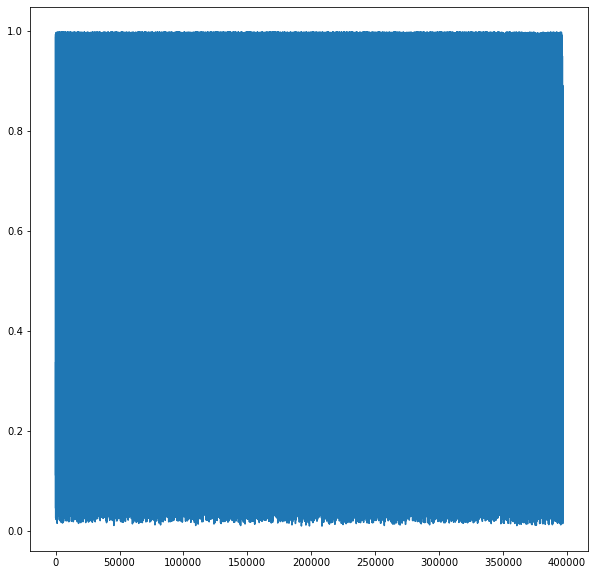

In [18]:
plt.plot(prediccion_aux['target'])
